In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import os
cwd = os.getcwd()
cwd

'/home/bde/Git/Informer2020'

In [2]:
PATH = cwd
# MM15 informer_4G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0
# BB62 informer_4G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_3
# CQI informer_5G_a_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1
# 5G Download informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1
DATA = 'informer_5G_b_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0' # BerlinV2X
#DATA = 'informer_5G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0' # 5G
#DATA = 'informer_5G_ftMS_sl96_ll48_pl2_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'
UNIVARIATE = True
shift_by = 1

In [3]:
metrics = np.load(f'{PATH}/results/{DATA}/metrics.npy')
metrics

array([5.3774305e+06, 5.3428240e+13, 7.3094625e+06, 3.0570877e-01,
       9.9611635e+00], dtype=float32)

In [4]:
real_prediction = np.load(f'{PATH}/results/{DATA}/real_prediction.npy')
real_prediction

array([[[15631420.]]], dtype=float32)

In [5]:
true = np.load(f'{PATH}/results/{DATA}/true.npy')
print(true.shape)
pred = np.load(f'{PATH}/results/{DATA}/pred.npy')
print(pred.shape)

(2176, 1, 1)
(2176, 1, 1)


used true[1:], pred[1:] and shifted[1:]
rmse for true vs pred: 7310848.5, true vs shifted 7517467.5
mae for true vs pred: 5378496.0, true vs shifted 5349686.0
mse for true vs pred: 53448502411264.0, true vs shifted 56512319848448.0


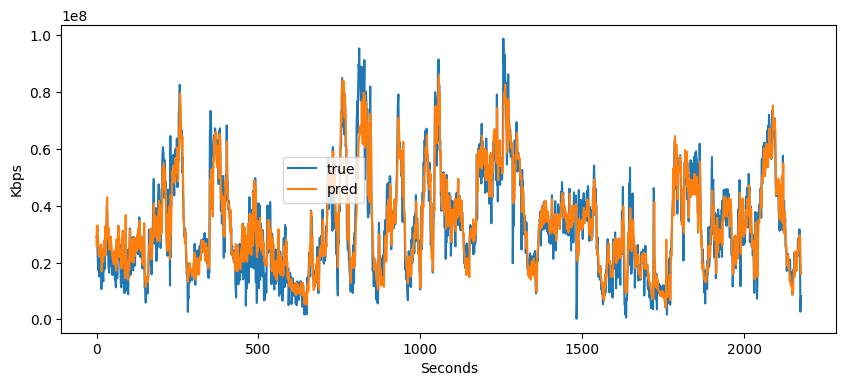

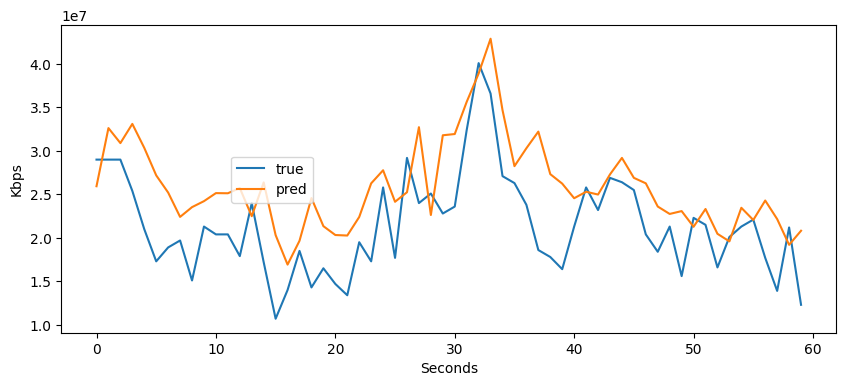

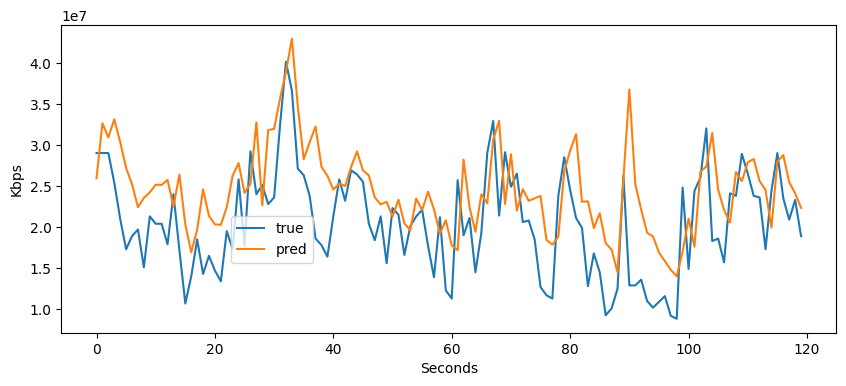

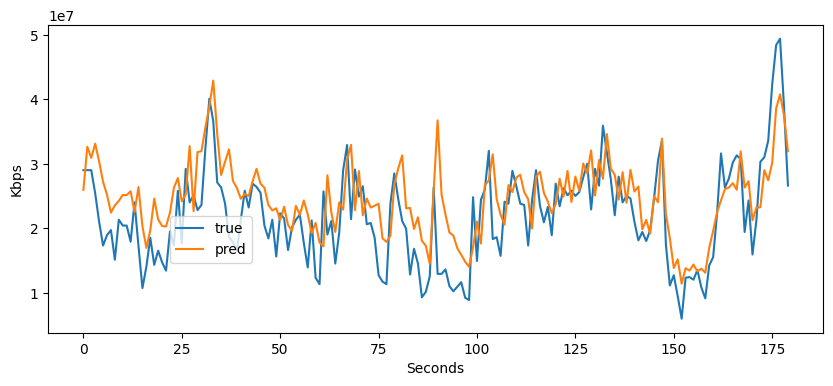

In [6]:
if UNIVARIATE:
    df = pd.DataFrame({'true': true.flatten(), 'pred': pred.flatten()})
    shifted = df['true'].shift(shift_by)

    true = df['true']
    pred = df['pred']
    
    print('used true[1:], pred[1:] and shifted[1:]')
    print(f'rmse for true vs pred: {mean_squared_error(true[shift_by:], pred[shift_by:], squared=False)}, true vs shifted {mean_squared_error(true[shift_by:], shifted[shift_by:], squared=False)}')
    print(f'mae for true vs pred: {mean_absolute_error(true[shift_by:], pred[shift_by:])}, true vs shifted {mean_absolute_error(true[shift_by:], shifted[shift_by:])}')
    print(f'mse for true vs pred: {mean_squared_error(true[shift_by:], pred[shift_by:])}, true vs shifted {mean_squared_error(true[shift_by:], shifted[shift_by:])}')

    ylabel = 'Kbps' #Kbps
    fig_size = (10, 4)
    df.plot(figsize=fig_size)
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel(ylabel) #
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.4, 0.4))
    plt.savefig(f'plots/{DATA}-full.pdf', bbox_inches='tight')
    plt.savefig(f'plots/{DATA}-full.png', bbox_inches='tight')

    scope = 60
    df.head(scope).plot(figsize=fig_size)
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel(ylabel)
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.21, 0.4))
    plt.savefig(f'plots/{DATA}-{scope}.pdf', bbox_inches='tight')
    plt.savefig(f'plots/{DATA}-{scope}.png', bbox_inches='tight')

    scope2 = scope *2
    df.head(scope2).plot(figsize=fig_size)
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel(ylabel)
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.21, 0.4))
    plt.savefig(f'plots/{DATA}-{scope2}.pdf', bbox_inches='tight')
    plt.savefig(f'plots/{DATA}-{scope2}.png', bbox_inches='tight')

    scope3 = scope *3
    df.head(scope3).plot(figsize=fig_size)
    #plt.title('Prediction on LTE dataset')
    # adding Label to the x-axis
    plt.xlabel('Seconds')
    plt.ylabel(ylabel)
    # adding legend to the curve
    plt.legend(bbox_to_anchor=(0.21, 0.4))
    plt.savefig(f'plots/{DATA}-{scope3}.pdf', bbox_inches='tight')
    plt.savefig(f'plots/{DATA}-{scope3}.png', bbox_inches='tight')

In [7]:
if not UNIVARIATE:
    df_true = pd.DataFrame.from_records(true)
    df_pred = pd.DataFrame.from_records(pred)
    df_shifted = df_true.shift(shift_by)

    print(f'used df_true[{shift_by}:], df_pred[{shift_by}:] and shifted[{shift_by}:]')
    print(f'rmse for true vs pred: {mean_squared_error(df_true[shift_by:], df_pred[shift_by:], squared=False)}, true vs shifted {mean_squared_error(df_true[shift_by:], df_shifted[shift_by:], squared=False)}')
    print(f'mae for true vs pred: {mean_absolute_error(df_true[shift_by:], df_pred[shift_by:])}, true vs shifted {mean_absolute_error(df_true[shift_by:], df_shifted[shift_by:])}')
    print(f'mse for true vs pred: {mean_squared_error(df_true[shift_by:], df_pred[shift_by:])}, true vs shifted {mean_squared_error(df_true[shift_by:], df_shifted[shift_by:])}')

    #plt.figure(figsize=(16, 8), dpi=150)

    #df_true_0.plot(subplots=True, label='true')
    #df_pred_0.plot(subplots=True, label='pred')

    #plt.title('Informer Multivariate')
    # adding Label to the x-axis
    #plt.xlabel('Years')
    # adding legend to the curve
    #plt.legend()